In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

plt.style.use ( 'ggplot')
import nltk

In [2]:
# reading the data

df = pd.read_csv ('Reviews.csv')
print(df.shape)
df = df.head(100000)
print (df.shape)

(568454, 10)
(100000, 10)


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


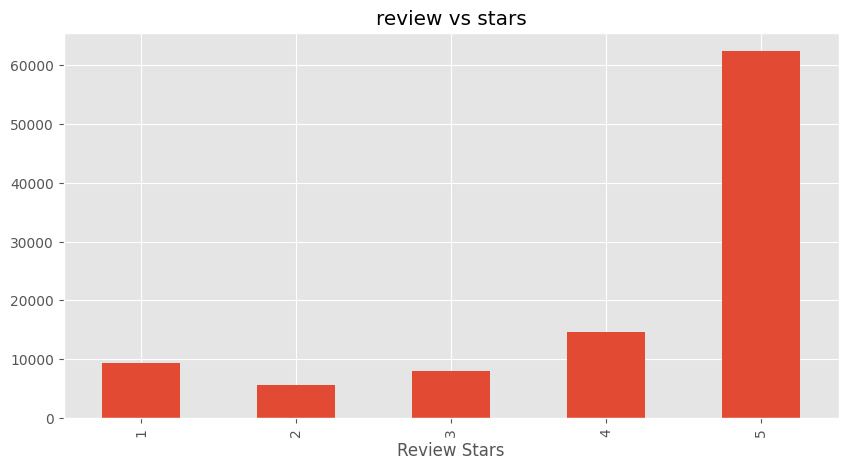

In [4]:
##quick eda

ax = df['Score'].value_counts().sort_index() \
        .plot ( kind = "bar", title ="review vs stars", figsize =(10,5))
ax.set_xlabel('Review Stars')
plt.show()


# Basic NLTK

## basic 


In [5]:
example = df['Text'][50]
print ( example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [6]:
tokens = nltk.word_tokenize(example)
tokens [:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged) 
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


#vader

## VADER Sentiment Scoring

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [10]:
sia.polarity_scores('ok')

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}

In [11]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [12]:
#running the polarity scores on the entire data set

# res = {}

# for i, row in tqdm(df.iterrows(), total = len(df)):
    
#     text = row ['Text']
#     myid = row ['Id']
#     res[myid] = sia.polarity_scores(text)

res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/100000 [00:00<?, ?it/s]

In [13]:
vaders = pd.DataFrame(res).T
vaders =  vaders.reset_index().rename(columns = {'index' : 'Id'})
vaders = vaders.merge(df, how ='left')

In [14]:
# now we have the sentimental scores and metadat

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#Plot VADER Results

Text(0.5, 1.0, 'Compound Score by Amazon Star Review')

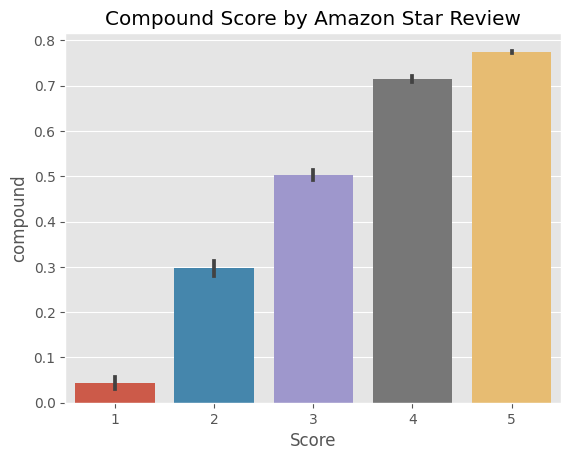

In [15]:
ax = sns.barplot(data = vaders, x = 'Score', y = 'compound')
ax.set_title('Compound Score by Amazon Star Review')

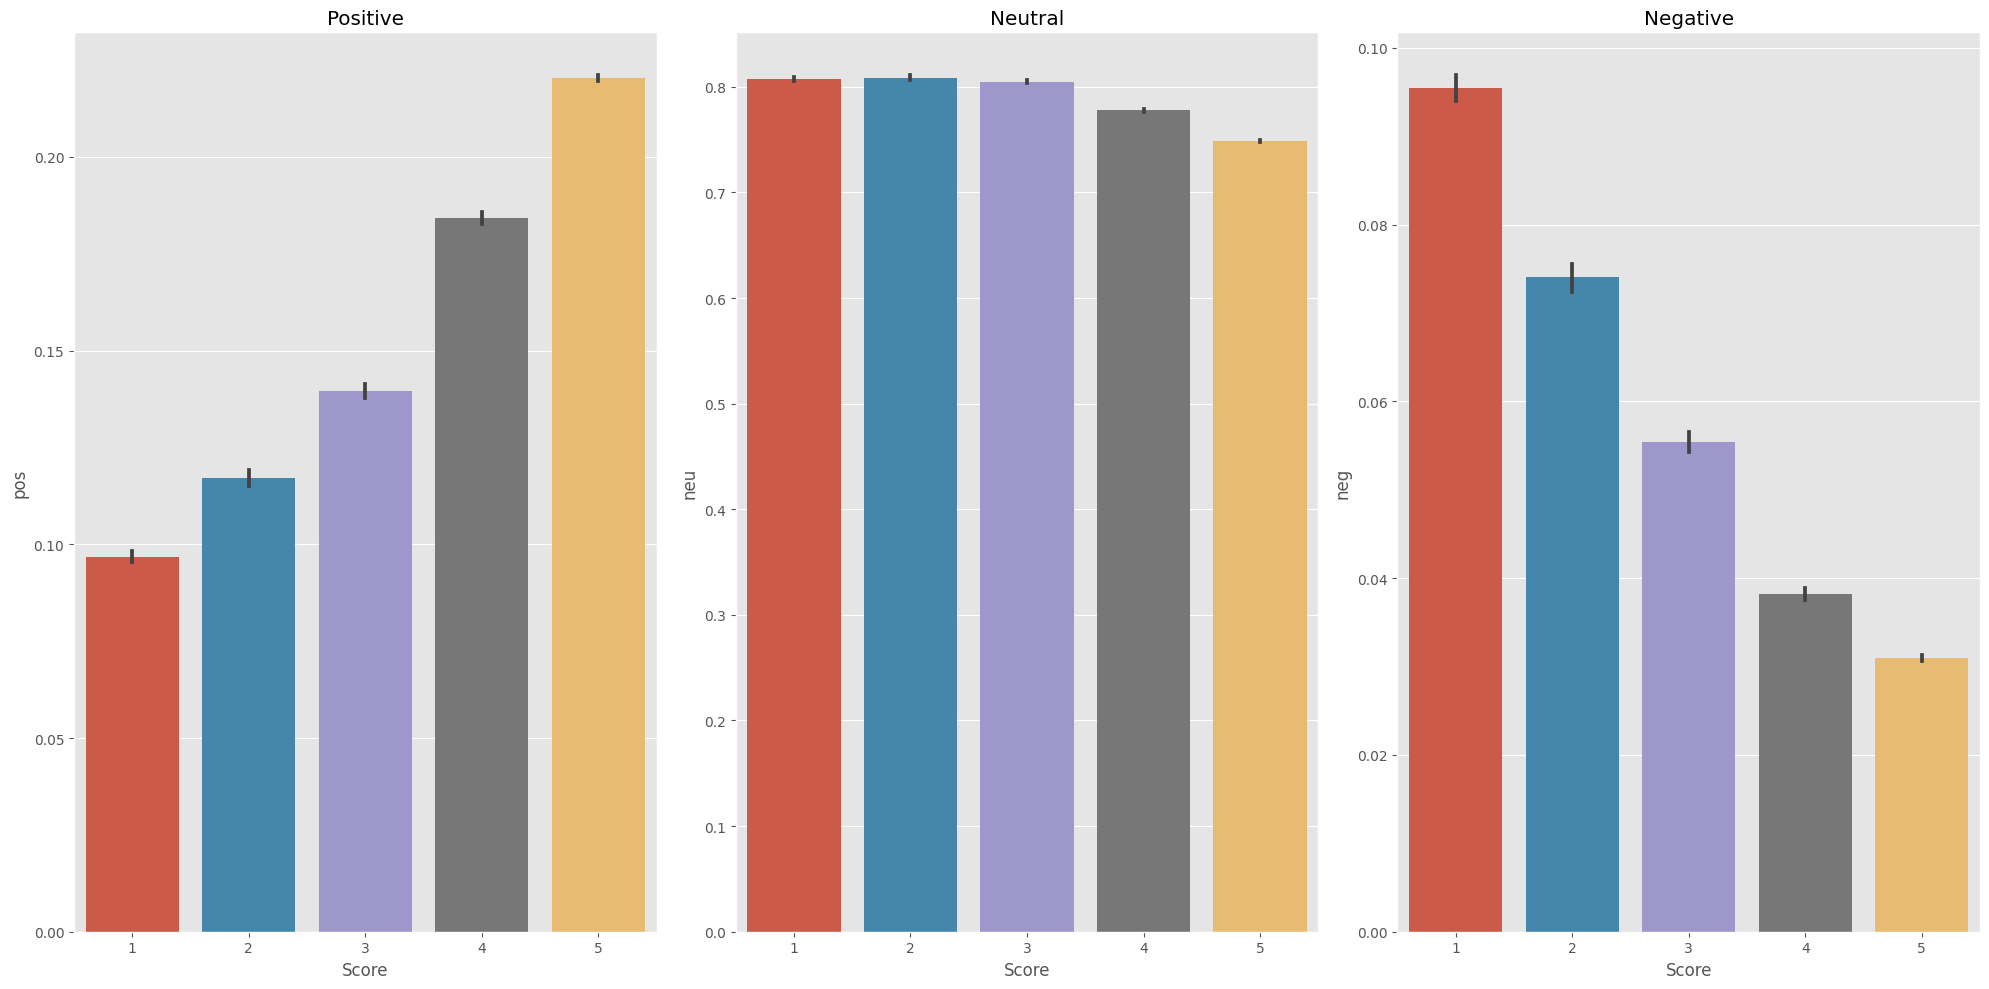

In [17]:

fig, axs = plt.subplots( 1,3, figsize = (20,10))

sns.barplot(data =vaders, x ='Score', y = 'pos' , ax = axs[0])
sns.barplot(data =vaders, x ='Score', y = 'neu' , ax = axs[1])
sns.barplot(data =vaders, x ='Score', y = 'neg' , ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# Roberta Pretrained Model


In [18]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [20]:

# vader result on example

print (example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [36]:
#for roberta

encoded_text = tokenizer(example, return_tensors ='pt')
output = model(**encoded_text)
print(output)
scores = output[0][0].detach().numpy()
print(scores)
scores =softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
    
    
}

print(scores_dict)


SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
[ 3.1436293 -0.7106685 -2.6558964]
{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.0029573706}


In [22]:
def polarity_scores_roberta(example):
    
    encoded_text = tokenizer(example, return_tensors ='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores =softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [37]:
res = {}
df=df.head(500)


for i, row in tqdm(df.iterrows(), total = len(df)):
    try :
        
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items() :
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')
        res
        
        

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [38]:
res

{1: {'vader_neg': 0.0,
  'vader_neu': 0.695,
  'vader_pos': 0.305,
  'vader_compound': 0.9441,
  'roberta_neg': 0.009624252,
  'roberta_neu': 0.049980428,
  'roberta_pos': 0.9403953},
 2: {'vader_neg': 0.138,
  'vader_neu': 0.862,
  'vader_pos': 0.0,
  'vader_compound': -0.5664,
  'roberta_neg': 0.5089861,
  'roberta_neu': 0.45241353,
  'roberta_pos': 0.038600344},
 3: {'vader_neg': 0.091,
  'vader_neu': 0.754,
  'vader_pos': 0.155,
  'vader_compound': 0.8265,
  'roberta_neg': 0.0032288984,
  'roberta_neu': 0.09806744,
  'roberta_pos': 0.8987037},
 4: {'vader_neg': 0.0,
  'vader_neu': 1.0,
  'vader_pos': 0.0,
  'vader_compound': 0.0,
  'roberta_neg': 0.0022951285,
  'roberta_neu': 0.09021923,
  'roberta_pos': 0.90748566},
 5: {'vader_neg': 0.0,
  'vader_neu': 0.552,
  'vader_pos': 0.448,
  'vader_compound': 0.9468,
  'roberta_neg': 0.0016347291,
  'roberta_neu': 0.01030247,
  'roberta_pos': 0.98806286},
 6: {'vader_neg': 0.029,
  'vader_neu': 0.809,
  'vader_pos': 0.163,
  'vader_compo

In [24]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {'index': 'Id'})

results_df =results_df.merge(df, how = 'left')

Comparing the scores between the models


In [25]:
results_df.columns
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Combine and compare, not in the project
then i did splitting of the reviews.csv into positive and negative csv
then i i did preprocessing on the positive and negative csv and obtained the wordcloud files
For accuracy, 

In [26]:
# sns.pairplot(data =results_df, 
#              vars = ['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos'],
            
#             hue ='Score', 
#              palette = 'tab10')

# plt.show()

# Finding Roberta Accuracy


In [27]:
rd = results_df 

rd['sentiment roberta'] = rd['roberta_pos'] - rd['roberta_neg']
# total value range is in -1 to 1 values


sorted_rd = rd.sort_values('sentiment roberta',ascending = False)
pos_rd = sorted_rd[sorted_rd['sentiment roberta']>0.1]
neg_rd = sorted_rd[sorted_rd['sentiment roberta']<-0.1]
neu_rd = sorted_rd[sorted_rd['sentiment roberta']==0]



pos_rd.to_csv('pos_roberta.csv', index = False)
neu_rd.to_csv('nue_roberta.csv', index = False)
neg_rd.to_csv('neg_roberta.csv', index = False)


#there is an extra sentiment so i am removing this now
#sorted_rd = sorted_rd.drop('sentiment', axis = 1)
#sorted_rd.tail()

In [39]:
from sklearn.metrics import accuracy_score

datarob = sorted_rd


datarob["polarity_rating"] = datarob.apply(lambda row: "negative" if row["sentiment roberta"] < -0.1 else "positive" if row["sentiment roberta"]>0.1 else "neutral", axis = 1)

    
threshold =3                             
datarob["score_rating"] = datarob["Score"].apply(lambda x: "positive" if x >= threshold else "negative") 

     
accuracy = accuracy_score(datarob["score_rating"], datarob["polarity_rating"])
print("Accuracy Roberta:", accuracy)

datarob
                                  

Accuracy Roberta: 0.9036144578313253


,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment roberta,polarity_rating,score_rating
362,365,0.033,0.621,0.346,0.9334,0.001597,0.004811,0.993592,B00437JI8Q,A3UM3M6WSUN5BR,S. Smith,1,1,5,1316217600,Best Bar,These are my favorite bars ever. The combo of ...,0.991994,positive,positive
450,453,0.000,0.500,0.500,0.9430,0.001787,0.004914,0.993299,B000G6RYNE,A1465JH39KR5O5,persia,0,0,5,1287360000,Best deal ever!,This was the best deal ever. The delivery was ...,0.991512,positive,positive
153,155,0.000,0.647,0.353,0.9803,0.001630,0.005390,0.992980,B000SV90J8,A1CY94Z8YWQV12,Karas M. Stewart,1,1,5,1267401600,JELL-O,AWESOME!!! such a yummy flavor I got it as a h...,0.991350,positive,positive
393,396,0.000,0.502,0.498,0.9677,0.001319,0.006035,0.992647,B001ELL6O8,A72H1W5S6UFMY,"King of Breakfasts ""King""",1,1,5,1278460800,A Great All Around Mix,I appreciate the fact that I can buy this prod...,0.991328,positive,positive
13,14,0.000,0.355,0.645,0.9466,0.001408,0.005883,0.992709,B001GVISJM,A18ECVX2RJ7HUE,"willie ""roadie""",2,2,4,1288915200,fresh and greasy!,good flavor! these came securely packed... the...,0.991301,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,253,0.107,0.893,0.000,-0.4767,0.968831,0.028154,0.003015,B0002567IW,A1SSKFPX72MSMR,"Janna M. Sicard ""missjanna""",0,0,1,1344556800,Sad outcome,"Five minutes in, one tentacle was bitten off, ...",-0.965815,negative,negative
379,382,0.318,0.515,0.167,-0.7184,0.972539,0.023539,0.003922,B003YXWAF8,A1KQXO716WOOD6,Allison Beegle,7,13,1,1309305600,Waste of money,These condiments are overpriced and terrible. ...,-0.968618,negative,negative
400,403,0.215,0.697,0.088,-0.6351,0.976329,0.020631,0.003040,B001ELL6O8,A2APBHKZCMD6DO,X,0,6,1,1207353600,Awful,Just awful! I thought food was supposed to ta...,-0.973288,negative,negative
50,51,0.220,0.780,0.000,-0.5448,0.976355,0.020687,0.002957,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",-0.973398,negative,negative



# Finding WordClouds for ROBERTA


POSITIVE WORDCLOUD


In [29]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment roberta
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.930771
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.470386
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.895475
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.905191
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.986428


In [30]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import sys, os
os.chdir(sys.path[0])

# Read CSV file into a pandas DataFrame
df2 = pd.read_csv('pos_roberta.csv')

# Extract text from a specific column
pos_rob_text1 = df2['Text'].to_string(index=False)

# Save the text to a text file
with open('pos_rob_text1.txt', 'w', encoding='utf-8') as file:
    file.write(pos_rob_text1)
    
    
text1 = open('pos_rob_text1.txt', mode = 'r', encoding = 'utf-8').read()
stopwords = set(stopwords.words('english'))

wc = WordCloud(
        background_color = 'white',
        stopwords= stopwords,
        height = 600,
        width = 400)

wc.generate(text1)
wc.to_file('Positive_ROBERTA.png')

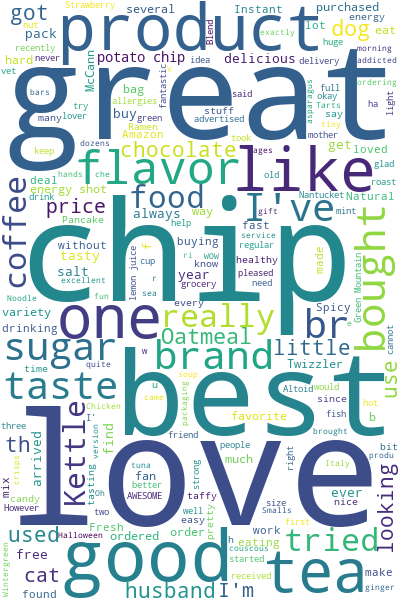

In [31]:
from IPython.display import Image
Image(filename = "Positive_ROBERTA.png", width = 500, height =1000)

NEGATIVE WORDCLOUD

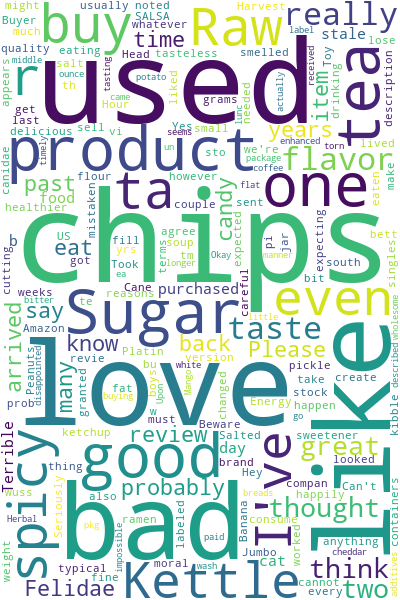

In [32]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import sys, os
os.chdir(sys.path[0])

# Read CSV file into a pandas DataFrame
df3 = pd.read_csv('neg_roberta.csv')

# Extract text from a specific column
neg_rob_text1 = df3['Text'].to_string(index=False)

# Save the text to a text file
with open('neg_rob_text1.txt', 'w', encoding='utf-8') as file:
    file.write(neg_rob_text1)
    
    
text2 = open('neg_rob_text1.txt', mode = 'r', encoding = 'utf-8').read()
stopwords = set(stopwords.words('english'))

wc = WordCloud(
        background_color = 'white',
        stopwords= stopwords,
        height = 600,
        width = 400)

wc.generate(text2)
wc.to_file('Negative_ROBERTA.png')

#displaying the word cloud which is generated in the above code
Image(filename = "Negative_ROBERTA.png", width = 500, height =1000)

# Finding Wordclouds using VADER
